# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="ticks")
import warnings
warnings.filterwarnings('ignore')

data_info = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
data_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz') 
data_movies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')

# After importing the csv files I want to take a look at all the data imported.

In [2]:
data_movies.head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [3]:
data_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


# Create a new data frame from data_info with only the folowing column names

In [4]:
new_movie = data_info.loc[:,('movie_title','critics_consensus','actors','production_company',
                             'tomatometer_status','tomatometer_rating','audience_rating',
                             'tomatometer_rotten_critics_count')]

new_movie.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19


# Organize and Cleaning Data

In [5]:
movie_overview= pd.merge(new_movie,data_budgets,how='inner',left_on='movie_title',right_on='movie')

In [6]:
movie_overview2 = pd.merge(movie_overview,data_movies, how='inner', left_on='movie_title',right_on='title')
movie_overview_columnDrop = movie_overview2.drop(['domestic_gross','movie','genre_ids','original_title','title','original_language','release_date_x','id_x'], axis = 1)
movie_overview_columnDrop.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81


# Drop Null Values and Split Actor Names

In [7]:
example = movie_overview_columnDrop.copy()
example.actors = example.actors.str.split(',')

In [8]:
example.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"[Logan Lerman, Brandon T. Jackson, Alexandra...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"[Catherine Keener, Amanda Peet, Oliver Platt...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81


# Explode the Data from the new data frame along the actor column

In [9]:
example = example.explode('actors')

In [10]:
example

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,Logan Lerman,20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,Brandon T. Jackson,20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,Alexandra Daddario,20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,Jake Abel,20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,Sean Bean,20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,Zootopia,The brilliantly well-rounded Zootopia offers a...,Jenny Slate,Walt Disney Animation Studios,Certified-Fresh,98.0,92.0,7,"$150,000,000","$1,019,429,616",269149,27.549,2016-03-04,7.7,9977
2499,Zootopia,The brilliantly well-rounded Zootopia offers a...,Nate Torrence,Walt Disney Animation Studios,Certified-Fresh,98.0,92.0,7,"$150,000,000","$1,019,429,616",269149,27.549,2016-03-04,7.7,9977
2499,Zootopia,The brilliantly well-rounded Zootopia offers a...,Bonnie Hunt,Walt Disney Animation Studios,Certified-Fresh,98.0,92.0,7,"$150,000,000","$1,019,429,616",269149,27.549,2016-03-04,7.7,9977
2499,Zootopia,The brilliantly well-rounded Zootopia offers a...,Don Lake,Walt Disney Animation Studios,Certified-Fresh,98.0,92.0,7,"$150,000,000","$1,019,429,616",269149,27.549,2016-03-04,7.7,9977


# Take a look at the column names of the data frame example

In [11]:
example.columns

Index(['movie_title', 'critics_consensus', 'actors', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'audience_rating',
       'tomatometer_rotten_critics_count', 'production_budget',
       'worldwide_gross', 'id_y', 'popularity', 'release_date_y',
       'vote_average', 'vote_count'],
      dtype='object')

In [12]:
example = example[example.actors.isin(example.actors.value_counts()[:100].index.tolist())]

In [13]:
example = pd.get_dummies(example, columns = ['actors'])

In [14]:
example[example.columns[15:].tolist() + ['worldwide_gross']].corr()

,actors_ Alan Tudyk,actors_ Alexander Flores,actors_ Allison Janney,actors_ Ananais J. Dixon,actors_ Anthony Mackie,actors_ April M. Lawrence,actors_ April Winchell,actors_ Beau Knapp,actors_ Ben Kingsley,actors_ Ben Mendelsohn,...,actors_ Woody Harrelson,actors_Gbenga Akinnagbe,actors_Jim Parsons,actors_Liam Neeson,actors_Marcia Gay Harden,actors_Mary Rigby-Abernathy,actors_Matt Damon,actors_Tom Cruise,actors_Tom Hardy,actors_Yann Arthus-Bertrand
actors_ Alan Tudyk,1.000000,-0.010834,-0.009103,-0.010127,-0.010127,-0.010127,-0.010127,-0.010127,-0.009369,-0.009103,...,-0.010603,-0.010127,-0.010127,-0.009369,-0.010127,-0.010127,-0.009103,-0.009628,-0.009369,-0.010127
actors_ Alexander Flores,-0.010834,1.000000,-0.009512,-0.010582,-0.010582,-0.010582,-0.010582,-0.010582,-0.009790,-0.009512,...,-0.011080,-0.010582,-0.010582,-0.009790,-0.010582,-0.010582,-0.009512,-0.010061,-0.009790,-0.010582
actors_ Allison Janney,-0.009103,-0.009512,1.000000,-0.008892,-0.008892,-0.008892,-0.008892,-0.008892,-0.008226,-0.007992,...,-0.009310,-0.008892,-0.008892,-0.008226,-0.008892,-0.008892,-0.007992,-0.008454,-0.008226,-0.008892
actors_ Ananais J. Dixon,-0.010127,-0.010582,-0.008892,1.000000,-0.009892,-0.009892,-0.009892,-0.009892,-0.009151,-0.008892,...,-0.010357,-0.009892,-0.009892,-0.009151,-0.009892,-0.009892,-0.008892,-0.009404,-0.009151,-0.009892
actors_ Anthony Mackie,-0.010127,-0.010582,-0.008892,-0.009892,1.000000,-0.009892,-0.009892,-0.009892,-0.009151,-0.008892,...,-0.010357,-0.009892,-0.009892,-0.009151,-0.009892,-0.009892,-0.008892,-0.009404,-0.009151,-0.009892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
actors_Mary Rigby-Abernathy,-0.010127,-0.010582,-0.008892,-0.009892,-0.009892,-0.009892,-0.009892,-0.009892,-0.009151,-0.008892,...,-0.010357,-0.009892,-0.009892,-0.009151,-0.009892,1.000000,-0.008892,-0.009404,-0.009151,-0.009892
actors_Matt Damon,-0.009103,-0.009512,-0.007992,-0.008892,-0.008892,-0.008892,-0.008892,-0.008892,-0.008226,-0.007992,...,-0.009310,-0.008892,-0.008892,-0.008226,-0.008892,-0.008892,1.000000,-0.008454,-0.008226,-0.008892
actors_Tom Cruise,-0.009628,-0.010061,-0.008454,-0.009404,-0.009404,-0.009404,-0.009404,-0.009404,-0.008701,-0.008454,...,-0.009847,-0.009404,-0.009404,-0.008701,-0.009404,-0.009404,-0.008454,1.000000,-0.008701,-0.009404
actors_Tom Hardy,-0.009369,-0.009790,-0.008226,-0.009151,-0.009151,-0.009151,-0.009151,-0.009151,-0.008467,-0.008226,...,-0.009582,-0.009151,-0.009151,-0.008467,-0.009151,-0.009151,-0.008226,-0.008701,1.000000,-0.009151


# Determining how many null values are present.

In [15]:
movie_overview_columnDrop.isnull().sum()

movie_title                           0
critics_consensus                   429
actors                               10
production_company                   18
tomatometer_status                    0
tomatometer_rating                    0
audience_rating                       5
tomatometer_rotten_critics_count      0
production_budget                     0
worldwide_gross                       0
id_y                                  0
popularity                            0
release_date_y                        0
vote_average                          0
vote_count                            0
dtype: int64

In [16]:
cellTotal = np.product(movie_overview_columnDrop.shape)

missing_values_count = movie_overview_columnDrop.isnull().sum()
total_missing = missing_values_count.sum()


percent_missing = (total_missing/cellTotal) * 100
print(percent_missing)

1.232


In [17]:
movie_overview_columnDrop.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81


In [18]:
movie_overview_dropNull = movie_overview_columnDrop.dropna()
movie_overview_dropNull.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81


In [19]:
movie_overview_dropDuplicates = movie_overview_dropNull.drop_duplicates(subset=['movie_title'], keep='last')

In [20]:
movie_overview_dropDuplicates.isnull().sum()

movie_title                         0
critics_consensus                   0
actors                              0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
audience_rating                     0
tomatometer_rotten_critics_count    0
production_budget                   0
worldwide_gross                     0
id_y                                0
popularity                          0
release_date_y                      0
vote_average                        0
vote_count                          0
dtype: int64

In [21]:
movie_overview_dropDuplicates.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81


# Replace dollar signs and commas out of the worldwide gross and production columns and change the data type to an integer

In [22]:
movie_overview_dropDuplicates['worldwide_gross']= movie_overview_dropDuplicates['worldwide_gross'].str.replace('$','').str.replace(',','')
movie_overview_dropDuplicates['production_budget']= movie_overview_dropDuplicates['production_budget'].str.replace('$','').str.replace(',','')

In [23]:
movie_overview_dropDuplicates.production_budget = movie_overview_dropDuplicates.production_budget.astype(int)
movie_overview_dropDuplicates.worldwide_gross = movie_overview_dropDuplicates.worldwide_gross.astype(int)

# Visualizing the upper and lower threshold

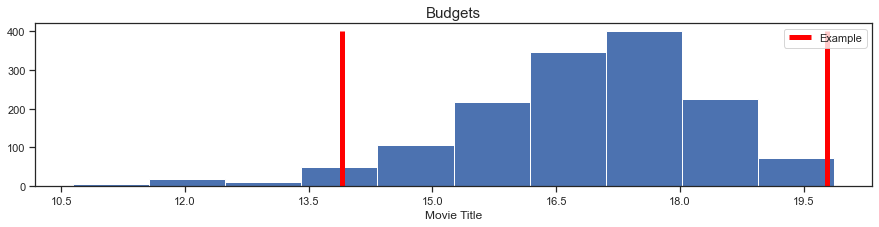

In [24]:
fig, ax = plt.subplots(figsize=(15,3))

frame = movie_overview_dropDuplicates[movie_overview_dropDuplicates.production_budget > 0]
frame['logged_budget'] = np.log(frame.production_budget)
ax.hist(frame.logged_budget)
upper_thresh = frame.logged_budget.mean() + frame.logged_budget.std() * 2
lower_thresh = frame.logged_budget.mean() - frame.logged_budget.std() * 2
ax.vlines(lower_thresh, ymin=0, ymax=400, lw=5, color='red')
ax.vlines(upper_thresh, ymin=0, ymax=400, lw=5, color='red')

# Add labels for x and y axes
ax.set_xlabel('Movie Title')


# Add a title for the plot
ax.set_title('Budgets', fontsize=15)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
# add a legend 
ax.legend(["Example"], loc=1);

In [25]:
budget_frame = frame[(frame.logged_budget > lower_thresh) & (frame.logged_budget < upper_thresh)]
budget_frame.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count,logged_budget
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,95000000,223050874,32657,26.691,2010-02-11,6.1,4229,18.369387
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,3000000,4570178,40247,5.945,2010-01-22,6.3,81,14.914123


# Make a new column subtracting worldwide gross and production budget to get the profit

In [26]:
budget_frame['movie_profit'] = budget_frame.worldwide_gross - budget_frame.production_budget
budget_frame

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count,logged_budget,movie_profit
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,95000000,223050874,32657,26.691,2010-02-11,6.1,4229,18.369387,128050874
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,3000000,4570178,40247,5.945,2010-01-22,6.3,81,14.914123,1570178
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,31500000,38771262,302156,13.651,2016-04-15,5.9,897,17.265498,7271262
5,Going the Distance,It's timelier and a little more honest than mo...,"Drew Barrymore, Justin Long, Charlie Day, Jaso...",New Line Cinema,Rotten,54.0,52.0,77,32000000,43603990,38073,8.281,2010-09-03,6.0,394,17.281246,11603990
9,Moonlight,Moonlight uses one man's story to offer a rema...,"Naomie Harris, André Holland, Mahershala Ali, ...",A24 Films,Certified-Fresh,98.0,79.0,7,1500000,65245512,376867,15.948,2016-10-21,7.4,3893,14.220976,63745512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,85000000,83080084,285135,4.180,2014-08-16,3.8,49,18.258162,-1919916
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,80000000,170805525,38317,10.764,2011-07-08,5.3,886,18.197537,90805525
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,50000000,55348693,329833,12.997,2016-02-12,4.7,1374,17.727534,5348693
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,35000000,12506188,351065,3.434,2016-09-02,5.5,43,17.370859,-22493812


In [27]:
budget_frame = budget_frame.drop(['worldwide_gross'], axis = 1)

# Create a new data frame

In [28]:
movie_actor_budget = budget_frame[['movie_title', 'actors', 'tomatometer_status','tomatometer_rating',
                                   'movie_profit','production_budget']].sort_values(by='tomatometer_rating', 
                                                                                    ascending = False)
                            
movie_actor_budget.reset_index(level=0, inplace=True)

In [29]:
movie_actor_budget = movie_actor_budget.drop(['index'], axis = 1)

In [30]:
movie_actor_budget

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
0,Toy Story,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Certified-Fresh,100.0,334545516,30000000
1,Toy Story 2,"Tim Allen, Joan Cusack, Kelsey Grammer, Don Ri...",Certified-Fresh,100.0,421358276,90000000
2,Gloria,"Paulina García, Sergio Hernández, Diego Fontec...",Certified-Fresh,99.0,-25032507,30000000
3,Le Havre,"André Wilms, Kati Outinen, Jean-Pierre Darrous...",Certified-Fresh,99.0,7980196,5500000
4,Lady Bird,"Saoirse Ronan, Laurie Metcalf, Tracy Letts, Lu...",Certified-Fresh,99.0,68610769,10000000
...,...,...,...,...,...,...
1383,Gotti,"John Travolta, Spencer Rocco Lofranco, Pruitt ...",Rotten,0.0,-3910900,10000000
1384,The Disappointments Room,"Kate Beckinsale, Mel Raido, Gerald McRaney, Lu...",Rotten,0.0,-11496239,15000000
1385,Max Steel,"Ben Winchell, Maria Bello, Ana Villafañe, Josh...",Rotten,0.0,-5436920,10000000
1386,Cabin Fever,"Gage Golightly, Matthew Daddario, Nadine Crock...",Rotten,0.0,28851664,1500000


# Look at the correlation in the data frame

In [31]:
movie_actor_budget.corr()

,tomatometer_rating,movie_profit,production_budget
tomatometer_rating,1.000000,0.207827,0.025463
movie_profit,0.207827,1.000000,0.653511
production_budget,0.025463,0.653511,1.000000


# Create a visualization looking at the correlation between Profit and Budget 

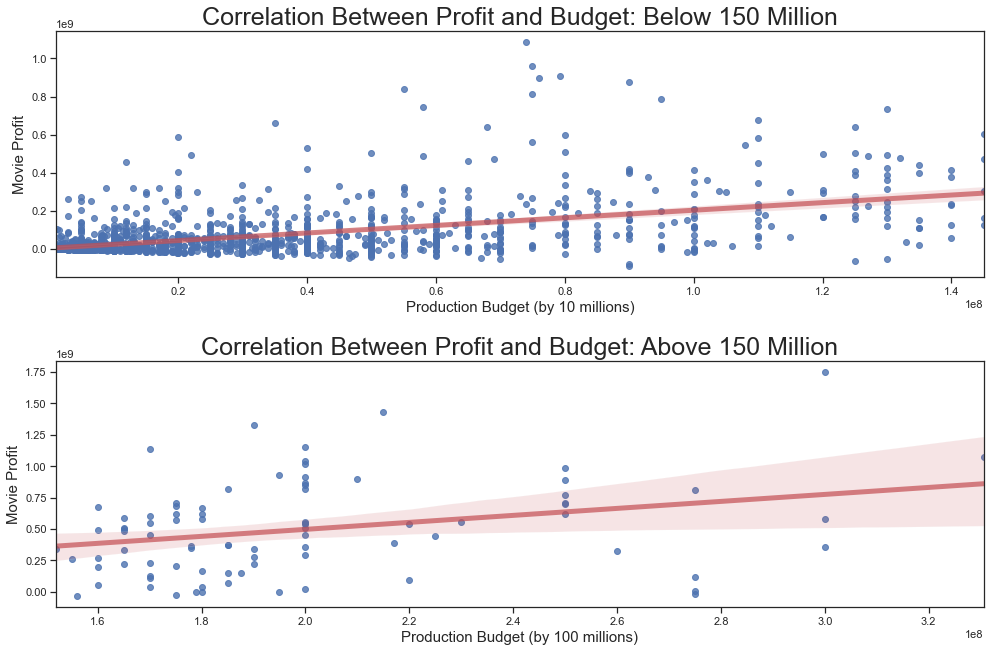

In [71]:
viz_frame = movie_actor_budget[movie_actor_budget.production_budget > 150000000]

x = viz_frame.production_budget
y = viz_frame.movie_profit

viz_frame2 = movie_actor_budget[movie_actor_budget.production_budget < 150000000]

x2 = viz_frame2.production_budget
y2 = viz_frame2.movie_profit

fig, ax = plt.subplots(figsize=(15,10), nrows=2)
fig.tight_layout(pad=5.0)
sns.regplot(x2,y2 ,line_kws={"color":"r","alpha":0.7,"lw":5}, ax=ax[0])
sns.regplot(x,y, line_kws={"color":"r","alpha":0.7,"lw":5}, ax=ax[1])


ax[0].set_title('Correlation Between Profit and Budget: Below 150 Million', fontsize=25)

ax[0].set_xlabel('Production Budget (by 10 millions)', fontsize=15)
ax[0].set_ylabel('Movie Profit', fontsize=15)

ax[1].set_title('Correlation Between Profit and Budget: Above 150 Million', fontsize=25)

ax[1].set_xlabel('Production Budget (by 100 millions)', fontsize=15)
ax[1].set_ylabel('Movie Profit', fontsize=15);

# Create a visualization looking at the correlation between tomatometer rating and budget

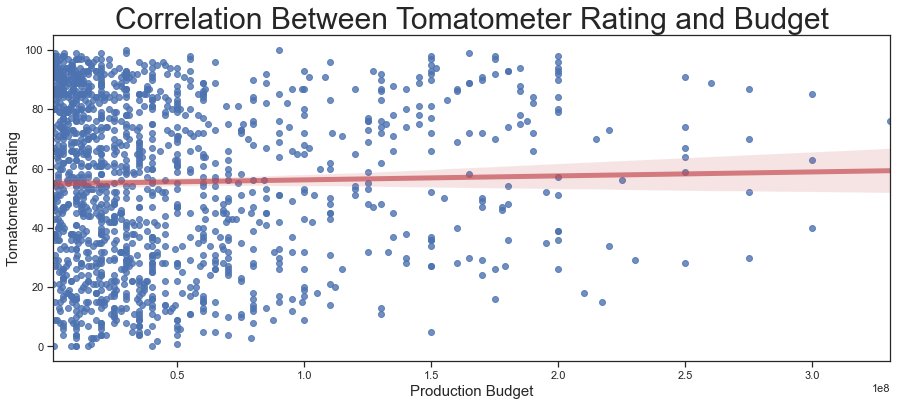

In [34]:
a = movie_actor_budget.production_budget
b = movie_actor_budget.tomatometer_rating

fig, ax = plt.subplots(figsize=(15,6))
sns.regplot(a,b ,line_kws={"color":"r","alpha":0.7,"lw":5})

ax.set_title('Correlation Between Tomatometer Rating and Budget', fontsize=30)

ax.set_xlabel('Production Budget', fontsize=15)
ax.set_ylabel('Tomatometer Rating', fontsize=15);

In [35]:
movie_actor_budget_copy = movie_actor_budget.copy()
only10 = movie_actor_budget_copy.sort_values(by=['movie_profit', 'tomatometer_rating'], ascending =False).head(10)
only10

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
280,Avengers: Infinity War,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",Certified-Fresh,85.0,1748134200,300000000
526,Jurassic World,"Chris Pratt, Bryce Dallas Howard, Vincent D'On...",Fresh,70.0,1433854864,215000000
325,Furious 7,"Vin Diesel, Paul Walker, Jason Statham, Dwayne...",Certified-Fresh,82.0,1328722794,190000000
46,Black Panther,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",Certified-Fresh,96.0,1148258224,200000000
835,Jurassic World: Fallen Kingdom,"Chris Pratt, Bryce Dallas Howard, Rafe Spall, ...",Rotten,47.0,1135772799,170000000
169,Frozen,"Kristen Bell, Idina Menzel, Josh Gad, Santino ...",Certified-Fresh,90.0,1122469910,150000000
724,Minions,"Chris Renaud, Hiroyuki Sanada, Michael Beattie...",Rotten,55.0,1086336173,74000000
424,Avengers: Age of Ultron,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Certified-Fresh,76.0,1072413963,330600000
87,Incredibles 2,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H...",Certified-Fresh,93.0,1042520711,200000000
380,Iron Man 3,"Robert Downey Jr., Gwyneth Paltrow, Don Cheadl...",Certified-Fresh,79.0,1015392272,200000000


# Create a visualization looking and Movie Profit and Tomatometer Rating of the top 10 movies

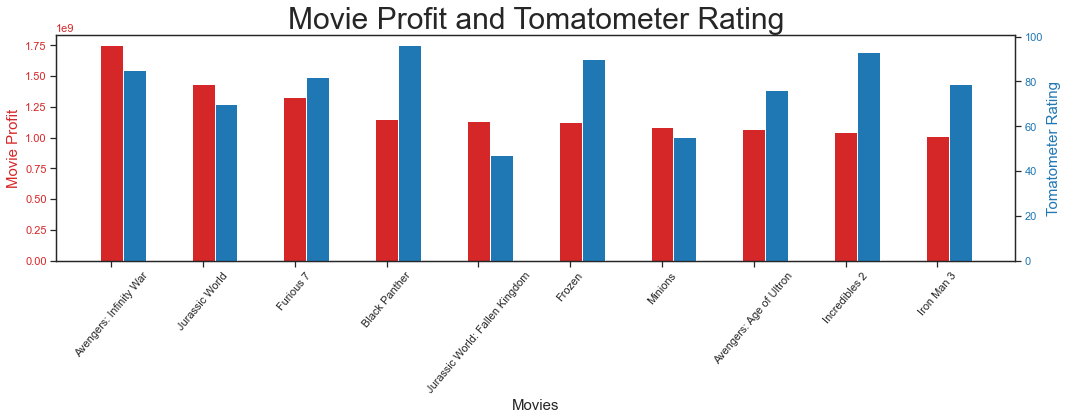

In [36]:
t2 = np.arange(10)
data1 = only10.movie_profit
data2 = only10.tomatometer_rating
width = 0.25

fig, ax1 = plt.subplots(figsize=(15,6))

color = 'tab:red'
ax1.set_title('Movie Profit and Tomatometer Rating', fontsize=30)
ax1.set_xlabel('Movies', fontsize=15)
ax1.set_ylabel('Movie Profit', color=color, fontsize=15)
plt.bar(t2, data1, width, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(t2, only10['movie_title'])
plt.xticks(rotation=50)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Tomatometer Rating', color=color, fontsize=15) 
plt.bar(t2+width, data2, width, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()